<br>
# Einblick in das Rechnen mit <i>agla</i>

von Holger Böttcher - hbomat@posteo.de
<br><br>
Diese Arbeit steht unter der freien Lizenz [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/deed.de)  
<br><br>
### Konstruktion regelmäßiger Vielecke
<br><br>
Das Paket <i>agla</i> ist in der Programmiersprache <b>Python</b> geschrieben und basiert
<br>auf dem ebenfalls in Python geschriebenen und quelloffen frei verfügbaren <b>CAS 
<br>SymPy</b> 

Für die geometrischen Objekte wurden Python-Klassen im Sinne der Objekt-
<br>Orientierten-Programmierung implementiert. Damit können entsprechende Python-
<br>Objekte erzeugt werden, mit denen unter Verwendung ihrer Eigenschaften und 
<br>Methoden am Computer gearbeitet wird 

Die Berechnungen werden in einem Jupyter-Notebook (mit englischer 
<br>Bedienoberfläche) durchgeführt; die vorliegende Datei wurde durch den HTML- 
<br>Export eines solchen Notebooks hergestellt
<br><br> 
<div style='color:yellowgreen'>
<i>Die Kommentare (nach #) sind lediglich Erläuterungen und für die Berechnungen</i> 
<br><i>nicht relevant, Analoges trifft auf die Kontrollausgaben zu</i>
</div>
<div style='color:yellowgreen'>
<i>Die hier dargestellten Grafiken sind Schnappschüsse der Darstellungen in agla</i>
</div>
<br><br>

In [1]:
%run agla/start   # Aktivierung des Paketes

<br>
## 1. Konstruktion von gleichseitigen Dreiecken

in der Ebene und in der $xy$-Ebene des Raumes

Ausgehend von zwei Punkten $A$ und $B$ wird die Lage des dritten Punktes $C$ auf der 
<br>Mittelsenkrechten der Grundseite berechnet
<br>

### Berechnungen in der Ebene

Zunächst wird eine einfache Grundseite auf der $x$-Achse gewählt, um die 
<br>Berechnung leicht nachvollziehen zu können

In [2]:
A = v(0, 0); B = v(1, 0)   # gegebene Punkte (sie werden mit ihren 
                           # Ortsvektoren identifiziert)

c = Strecke(A, B)          # die Grundseite des Dreiecks

M = c.mitte                # der Mittelpunkt von c 
M                          # Kontrollausgabe  

Vektor

In [3]:
ms = c.gerade.normale(M)   # die Mittelsenkrechte im Punkt M 
    
-ms.koord   #  Geradengleichung in Koordinatenform; Kontrollausgabe

In [4]:
# Der gesuchte Punkt C ist Punkt der Mittelsenkrechten mit  
# irgendeinem Parameterwert t

C = ms.pkt(t)

C   # Kontrollausgabe

Vektorschar([t])

Die Gleichung zum Auffinden von <i>t</i> ergibt sich aus der Bedingung der Gleichseitigkeit 
<br>des Dreiecks, also

$\qquad$<i>Abstand zwischen A und C = Länge von c</i>     

(für <i>B</i> ergibt sich der gleiche Abstand)

Für die Auflösung muss sie so umgeformt werden, dass die rechte Seite gleich 0 ist
<br>zu schreiben ist dann nur die linke Seite

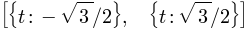

In [5]:
L = löse(Abstand(A, C) - c.länge)
L 

Das Ergebnis wird als Liste mit zwei Elementen (für die  beiden Lösungen) dargestellt
<br>Jedes Element ist eine Schlüssel-Wert-Liste (ein Python-*dictionary*) mit nur einem 
<br>Eintrag

Der Zugriff auf die positive Lösung erfolgt zunächst über den Index in der Liste (1, da 
<br>Python ab 0 zählt) und danach über den Schlüssel (<i>t</i>):

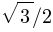

In [6]:
t0 = L[1][t]

t0   # Kontrollausgabe

In [7]:
C = ms.pkt(t0)

C   # der gesuchte Punkt

Vektor

Das Dreieck mit den Eckpunkten <i>A</i>, <i>B</i> und <i>C</i> ist in der Tat gleichseitig:

In [8]:
d = Dreieck(A, B, C)

d.längen, d.winkel   # die Seitenlängen und Innenwinkel von d


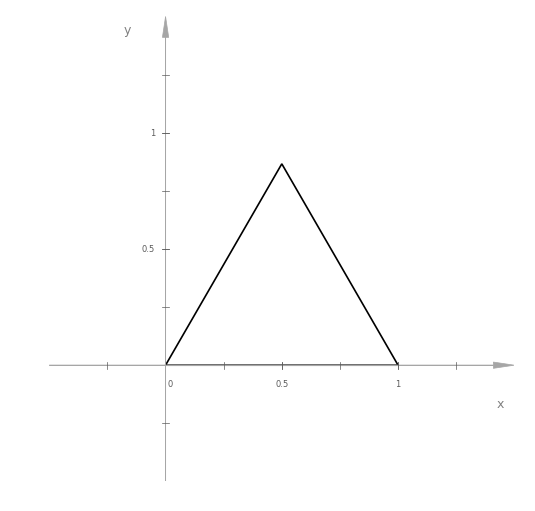

In [9]:
sicht_box(-0.5, 1.5)
zeichne([d, 2])

Werden die Koordinaten von $A$ und $B$  geändert und alle Berechnungen erneut 
<br>durchgeführt, kann man sich überzeugen, dass sie für eine beliebige Lage der beiden 
<br>Punkte zum Ergebnis führen 

Zur Anwendung in der $xy$ - Ebene des Raumes sind folgende Änderungen zu machen:
* die Ausgangspunkte $A$ und $B$ erhalten als dritte Koordinate $0$
* eine $normale$-Methode für Geraden ist dort nicht definiert; die Richtung der 
  <br>Mittelsenkrechten muss anders ermittelt werden 
* ebenfalls nicht definiert ist die $koord$-Eigenschaft für Geraden, wohl aber die $prg$-
  <br>Eigenschaft (zur Anzeige der Parametergleichung); diese ist auch in der Ebene 
  <br>verfügbar: 

In [10]:
ms.prg

<IPython.core.display.Math object>

### Berechnungen im allgemeinen Fall 

Mit den angeführten Änderungen wird ein im Sinne der Aufgabenstellung 
<br>allgemeingültiger Algorithmus erarbeitet. Dieser wird als Python-Funktion 
<br>bereitgestellt, die das erzeugte Dreieck zurückgibt

In [11]:
# Definition der Funktion

# Parameter sind die Endpunkte der Ausgangsstrecke

# Es wird die dim-Eigenschaft (Dimension) benutzt, die alle 
# agla-Objekte haben

def gleich_seitiges_dreieck(A, B):
    
    c = Strecke(A, B) 
    M = c.mitte
    
    ri = c.gerade.richt   # Richtungsvektor der Tägergeraden von c
    if A.dim == 2:        # Unterscheidung R^2 und R^3
        norm = Vektor(-ri.y, ri.x)   # Normalenvektor der Strecke
    else:
        norm = Vektor(-ri.y, ri.x, 0)
         
    ms = Gerade(M, norm)
    C = ms.pkt(t)
    
    L = löse(Abstand(A, C) - c.länge)   
    t0 = L[1][t]                         

    C = ms.pkt(t0)
    
    return Dreieck(A, B, C)


Beispiele für den Gebrauch der Funktion

In [12]:
# Aufruf der Funktion in der Ebene

A = v(-1, 0); B = v(2, 2)

dd = gleich_seitiges_dreieck(A, B)   

dd.punkte, dd.längen, dd.winkel


((Vektor, Vektor, Vektor), (√13, √13, √13), (60.0, 60.0, 60.0))

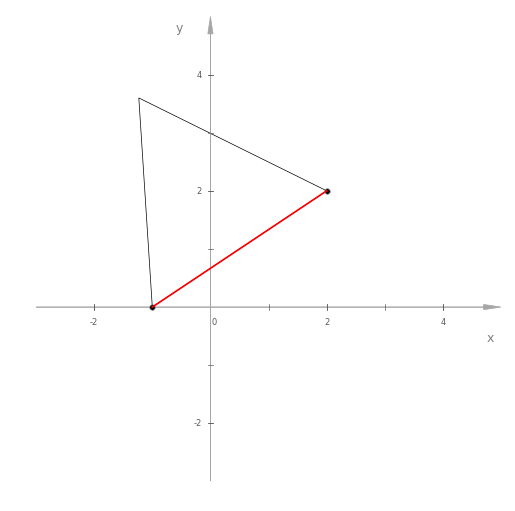

In [13]:
sicht_box(-3, 5)
zeichne( dd, A, B, [Strecke(A, B), rot, 2])
         

In [14]:
# Aufruf der Funktion im Raum

ddd = gleich_seitiges_dreieck(v(-3, -4, 0), v(2, 3, 0))   

ddd.punkte, ddd.längen, ddd.winkel


((Vektor, Vektor, Vektor), (√74, √74, √74), (60.0, 60.0, 60.0))

In [15]:
sicht_box(10)
zeichne([ddd, blau, 2], xy_gitter=ja)

<img src='bilder/bild3.png', align='left'><br>

Für den eventuell beabsichtigten allgemeinen Gebrauch der Funktion fehlen nur 
<br>noch Eingabekontrollen bezüglich der Argumente und die Einbindung der Funktion in
<br>die Arbeitsumgebung des Anwenders<br>
(deutsche Umlaute und veränderte Operatoren sind dann nicht mehr zu verwenden)

<i>Man kann sich überlegen, dass bei rationalen Koordinaten von $A$ und $B$ mindestens 
<br>eine der Koordinaten von $C$ eine irrationale Zahl (Wurzelausdruck) ist. Somit besteht 
<br>schon bei dieser einfachen Aufgabe die Notwendigkeit, mit irrationalen Koordinaten 
<br>von Punkten bzw. Komponenten von Vektoren rechnen zu können</i>
<br><br>

## 2. Konstruktion von regelmäßigen Vielecken 

am Beispiel von Fünfecken

Die Eckpunkte eines <i>n</i> - Ecks werden durch die Teilung des Umkreises in <i>n</i> gleiche
<br>Teile gewonnen
<br>

### Umkreis ist der Einheitskreis <br>

In [16]:
k = EinhKreis2; k.mitte, k.radius  # der Einheitskreis ist vordefiniert

(Vektor, 1)

In [17]:
k.pkt(t)   # der allgemeine Punkt des Kreises; t - Winkel in Grad

Vektorschar([t])

Das Fünfeck wird anhand einer Liste von aufeinander folgenden Punkten erzeugt

In [18]:
n = 5   # die Anzahl der Ecken

Fünfeck = fe = Figur( [ k.pkt(i * 360/n) for i in (0, 1, 2, 3, 4, 5) ] )   
                                             # in range(n+1) ist möglich

Die Liste der Eckpunkte der (geschlossenen) Figur ist

In [19]:
pfad = fe.pfad; pfad

[Vektor, Vektor, Vektor, Vektor, Vektor, Vektor]

Die Abstände benachbarter Punkte sind gleich:

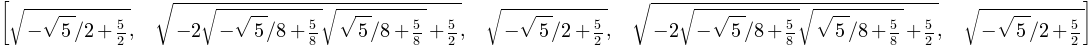

In [20]:
[ Abstand(pfad[i], pfad[i+1]) for i in range(n) ]   


Die Werte sind scheinbar unterschiedlich. Der nummerische "Nachweis" der Gleichheit
<br>reicht eventuell in der Schule aus

In [21]:
[ Abstand(pfad[i], pfad[i+1], d=10) for i in range(n) ]    

Auch der symbolische Nachweis ist hier unmittelbar möglich

(die Funktion <i>einfach</i> beruht auf den SymPy-Funktionen zur Vereinfachung <i>simplify, 
<br>nsimplify, ...</i>)

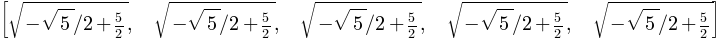

In [22]:
[ einfach(Abstand(pfad[i], pfad[i+1]), num=ja) for i in range(n) ] 


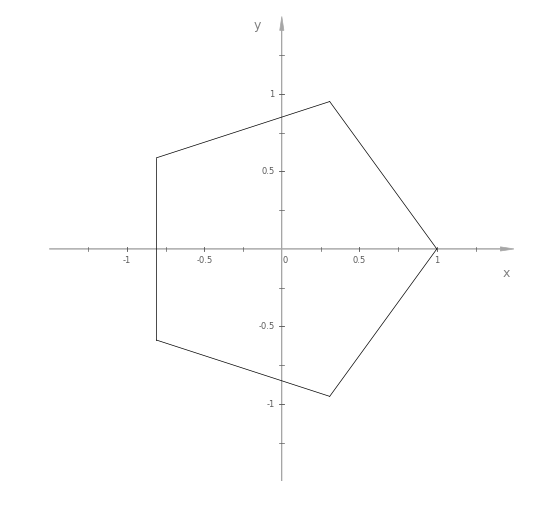

In [23]:
sicht_box(1.5)
zeichne(fe)

### Konstruktion eines Fünfecks mit vorgegebener Seitenlänge $a$
Die Konstruktion wird auf der Basis des oben erhaltenen Fünfecks mittels einer 
<br>zentrischen Streckung durchgeführt; eine Formel für den Streckfaktor wird gewonnen

In [24]:
fe1 = fe.bild(streckung(O2, f))   # O2 - Ursprung, f - Streckfaktor

In [25]:
ecken = fe1.ecken; ecken

[Vektorschar([f]), Vektorschar([f]), Vektorschar([f]), Vektorschar([f]), Vekto
rschar([f])]


Ermittlung einer Formel für den Streckfaktor, um die vorgegebene Seitenlänge $a$ 
<br>zu erhalten

Die Bedingung führt auf die Gleichung 

$\qquad$<i>Abstand(ecke1, ecke2) = a</i>

Die rechte Seite wird zu 0 gemacht, da nur die linke Seite interessiert 
und Python <br>ab 0 zählt, wird notiert

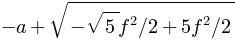

In [26]:
gl = Abstand(ecken[0], ecken[1]) - a   # Gleichung für f,
gl                                     # rechte Seite wird = 0 angenommen

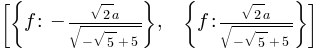

In [27]:
L = löse(gl, f); L    # Auflösung 

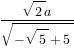

In [28]:
ff = L[1][f]; ff   # der berechnete positive Faktor

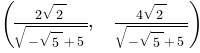

In [29]:
f2 = ff.subs(a, 2); f4 = ff.subs(a, 4)  # 2 verschiedene Seitenlängen
f2, f4                      

In [30]:
fe2 = fe.bild(streckung(O2, f2))   # Fünfeck mit der Seitenlänge 2
fe4 = fe.bild(streckung(O2, f4))   # ebenso, 4

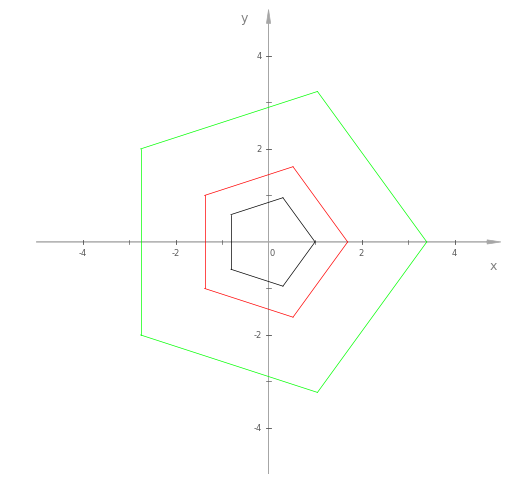

In [31]:
sicht_box(5)
zeichne(fe, [fe2, rot], [fe4, grün])

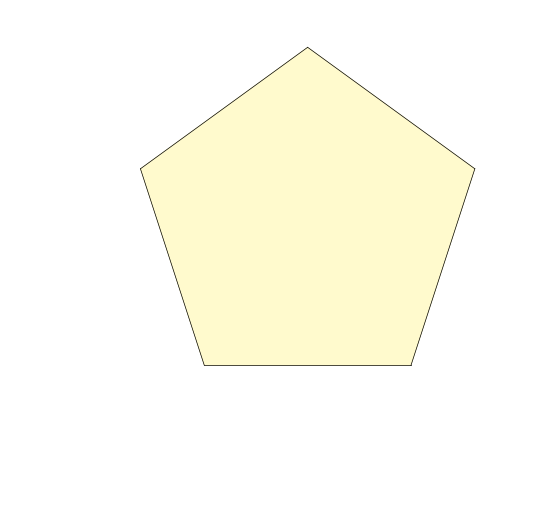

In [32]:
fe3 = fe2.bild(drehung(O2, 90))   # Erzeugung einer "gewohnten" lage
                            
sicht_box(-2.5, 2)
zeichne([fe3, 'lemonchiffon', 'füll=ja'], fe3, achsen=nein)   

Nachweis der Regelmäßigkeit des Fünfecks *fe3*: die Abstände benachbarter Punkte 
<br>sind alle gleich 2 

In [33]:
pfad = fe3.pfad; pfad

[Vektor, Vektor, Vektor, Vektor, Vektor, Vektor]

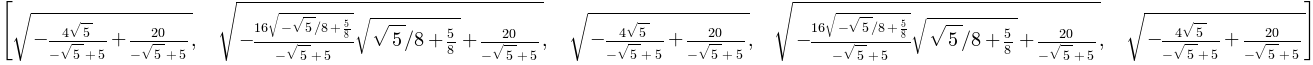

In [34]:
[ Abstand(pfad[i], pfad[i+1]) for i in range(n) ]  

Die Ungleichheit ist nur scheinbar 

In [35]:
[ einfach(Abstand(pfad[i], pfad[i+1]), num=ja) for i in range(n) ]

Mit etwas mehr Aufwand gelingt der Nachweis gleicher Längen auch bei unbestimmtem
<br> <i>a</i> (das wird hier nicht durchgeführt)
<br><br>

### Übertragung in die $xy$ - Ebene des Raumes

In [36]:
e4 = [v(p.x, p.y, 0) for p in fe3.ecken]; e4   # die Eckenliste

[Vektor, Vektor, Vektor, Vektor, Vektor]

In [37]:
fe4 = Körper(e4, fe.kanten)   # ein ebener Körper 

(Eine Körper-Instanz wird formal durch eine Menge von Punkten und eine 
Menge <br>von Verbindungen zwischen den Punkten (Kanten) definiert. Die Kantenliste 
ist <br>dieselbe wie beim Ausgangs-Fünfeck):

In [38]:
fe.kanten

In [39]:
sicht_box(3)
zeichne([fe4, gelb, 'füll=ja'])

<img src='bilder/bild4.png', align='left'><br>